In [1]:
import sys, os
sys.path.append('../../luseepy')
#print(sys.path)
#kernel_name = os.path.basename(sys.executable.replace("/bin/python",""))
#print(kernel_name)
import lusee
import numpy as np
import matplotlib.pyplot as plt

In [2]:
night = 2600
import  astropy.units   as u
obs = lusee.LObservation(night, deltaT_sec=3600)

/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 31 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0.5, 1.0, 'Celestial Positions in LuSEE First Night 2026')

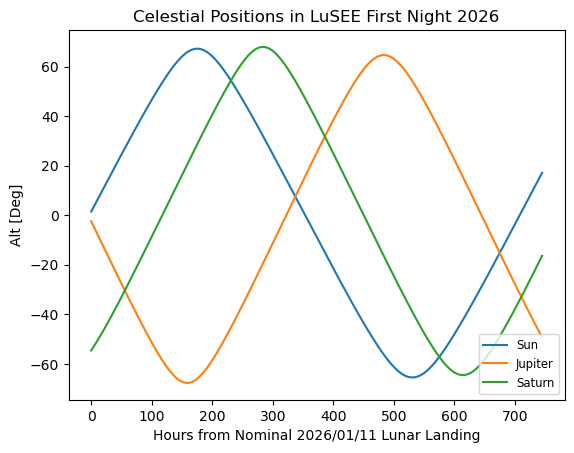

In [10]:
#plot jupyter attitude
deltaT=3600 #In seconds
obs = lusee.LObservation('2026-01-11 00:00:00 to 2026-02-11 00:00:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')
plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Alt [Deg]")
plt.title("Celestial Positions in LuSEE First Night 2026")

In [11]:
#Calculate remaining daylight on first day from nominal landing of Jan 11th 2026

from    lusee.LunarCalendar  import LunarCalendar
lc = LunarCalendar()
time_start, time_end = lc.get_lunar_start_end(2511)
daylight_remaining = np.where(alt<0)[0][0]-1
print("Start Time of Nominal Landing Day: ", time_start)
print("End Time of Nominal Landing Day: ",time_end)
day_length = time_end - time_start
print("Length of day: ", (day_length*(deltaT)/3600), "hrs")

totsec = daylight_remaining*deltaT
hours = totsec//3600
minutes = (totsec%3600)//60
sec =(totsec%3600)%60 
print("Daylight remaining after nominal landing: %d hrs %d min %d sec" %(hours,minutes,sec))

Start Time of Nominal Landing Day:  2025-12-19 21:02:44.449598
End Time of Nominal Landing Day:  2026-01-18 11:42:13.312113
Length of day:  29.610750723556475 hrs
Daylight remaining after nominal landing: 353 hrs 0 min 0 sec


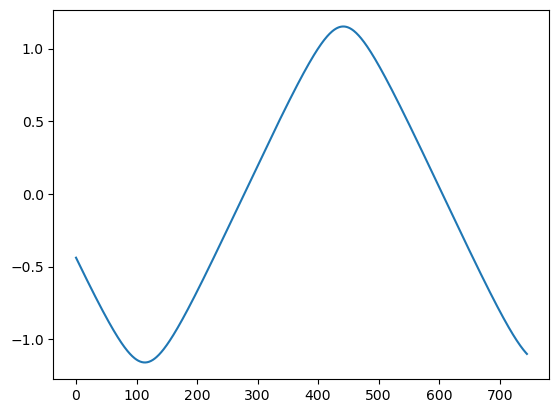

In [12]:
# for each lunar night plot the crab altitude
crab_ra, crab_dec = '05h34m31.94s', '+22d00m52.2s'
alt, az = obs.get_track_solar('sun')
w=np.where(alt<0)
altr, azr = obs.get_track_ra_dec(ra=crab_ra, dec=crab_dec)
plt.plot(altr)
    

In [13]:
## examples of alt day specficiations

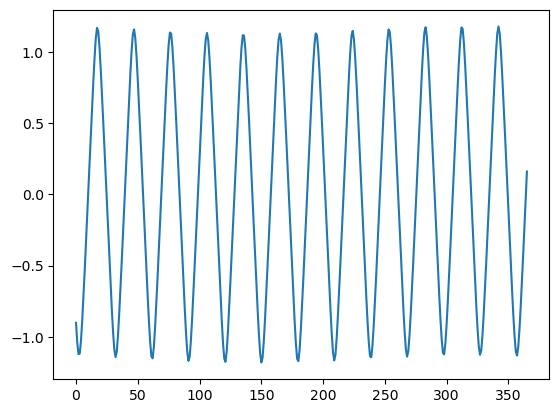

In [14]:
obs = lusee.LObservation('CY26',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)

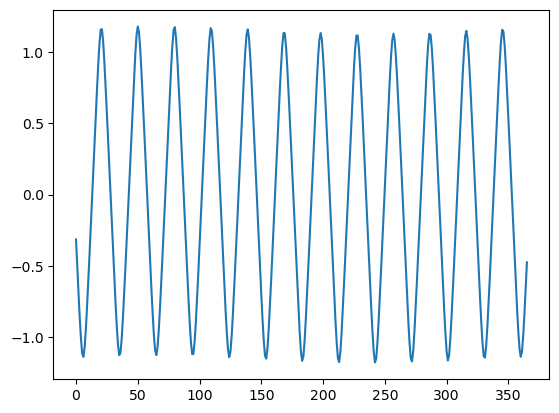

In [15]:
obs = lusee.LObservation('FY2026',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)

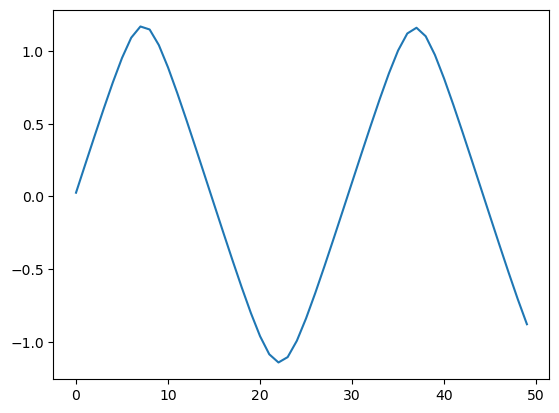

In [16]:
obs = lusee.LObservation('2026-01-11 00:00:00 to 2026-03-01 00:00:00',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)